Notebook para comparar los modelos hechos del dataset con variables de las diferencias de medias ponderadas (P2_dif)

- **Tarea del backlog:** https://github.com/UCM-GIDIA-PD1/c2425-R4/issues/52
- **Propósito del código:** Comparaciones de los modelos del dataframe con variables de las diferencias de medias ponderadas (P2_dif).
- **Autor(es):** Carlos Vallejo.  
- **Descripción y uso:** El objetivo de este notebook es ver que modelo nos da el resultado más óptimo.

In [1]:
import os
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,log_loss, f1_score, roc_auc_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.tree import plot_tree

## Carga y preprocesamiento de los datos

In [8]:
ruta_train =  os.path.join("..","..","..", "data", "P2_dif","train.parquet")
train = pd.read_parquet(ruta_train)

ruta_test =  os.path.join("..","..","..", "data", "P2_dif","test.parquet")
test = pd.read_parquet(ruta_test)

np.random.seed(42)

test.head()

,DATE,Peleador_A,Peleador_B,WINNER,KD_DIFF,SIG_STR_DIFF,TD_DIFF,SUB_ATT_DIFF,REV_DIFF,CTRL_DIFF,...,Record_DIFF,Peleas_DIFF,Puntos_DIFF,Racha_DIFF,Victorias_KO_DIFF,Victorias_Sub_DIFF,Victorias_Decision_DIFF,Derrotas_KO_DIFF,Derrotas_Sub_DIFF,Derrotas_Decision_DIFF
0,2022-11-19,Kennedy Nzechukwu,Ion Cutelaba,False,-0.4,-0.1032,-0.110729,0.36,0.00,-39.60,...,-1.0,-6,86.483419,1,-0.64,0.00,-1.0,-1.00,-1.96,-1.40
1,2022-11-19,Vince Morales,Miles Johns,True,-0.4,-0.0820,0.153846,0.00,0.36,-52.16,...,0.0,2,14.457185,0,-1.00,0.00,1.0,0.00,-0.36,2.36
2,2022-11-19,Andre Fialho,Muslim Salikhov,True,0.4,0.0696,-0.192661,0.00,0.00,-54.80,...,-4.0,-3,-62.740928,0,-0.40,0.00,-2.6,0.00,-1.00,1.00
3,2022-11-19,Jennifer Maia,Maryna Moroz,False,0.0,-0.1640,-0.069020,-1.08,0.00,-340.04,...,2.0,0,-22.321428,-3,0.00,-0.36,-0.6,0.00,0.00,0.96
4,2022-12-03,Eryk Anders,Kyle Daukaus,False,0.0,-0.1396,-0.158176,-1.68,0.40,189.72,...,-1.0,8,-58.874428,0,3.00,-0.60,2.0,0.64,0.60,2.36


## BASELINE

Como modelo base creamos un modelo que predice que gana el peleador que más puntos tenga.

In [7]:
columnasQuitar = ["DATE","Peleador_A","Peleador_B", "WINNER"]

X_train_baseline = train.drop(columns=columnasQuitar)
y_train_baseline = train['WINNER']
X_test_baseline = test.drop(columns=columnasQuitar)
y_test_baseline = test['WINNER']

y_pred_baseline = X_test_baseline["Puntos_DIFF"] < 0

print("Reporte de clasificación baseline:")
print(classification_report(y_test_baseline, y_pred_baseline))

Reporte de clasificación baseline:
              precision    recall  f1-score   support

       False       0.58      0.62      0.60       349
        True       0.51      0.46      0.48       290

    accuracy                           0.55       639
   macro avg       0.54      0.54      0.54       639
weighted avg       0.55      0.55      0.55       639



-- Métricas del modelo base con hiperparámetros ajustados --
Accuracy: 0.5446009389671361
F1-Score: 0.5237
AUC-ROC: 0.5452
Precisión: 0.4984
Sensibilidad: 0.5517
Log-loss: 2.220446049250313e-16
[[188 161]
 [130 160]]


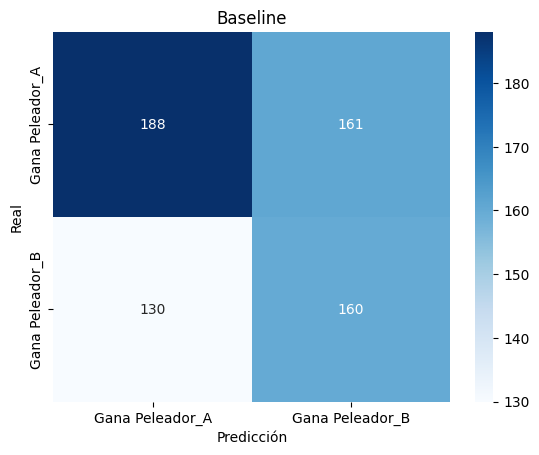

In [6]:
print("-- Métricas del modelo base con hiperparámetros ajustados --")

print("Accuracy:", accuracy_score(y_test_baseline, y_pred_baseline))
f1_test = f1_score(y_test_baseline, y_pred_baseline)
roc_auc_test = roc_auc_score(y_test_baseline, y_pred_baseline)
precision_test = precision_score(y_test_baseline, y_pred_baseline)
recall_test = recall_score(y_test_baseline, y_pred_baseline)
log_loss_test = log_loss(y_test_baseline,y_test_baseline)
print(f"F1-Score: {f1_test:.4f}")
print(f"AUC-ROC: {roc_auc_test:.4f}")
print(f"Precisión: {precision_test:.4f}")
print(f"Sensibilidad: {recall_test:.4f}")
print(f"Log-loss: {log_loss_test}")
print(confusion_matrix(y_test_baseline, y_pred_baseline))

cm = confusion_matrix(y_test_baseline, y_pred_baseline)

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Gana Peleador_A', 'Gana Peleador_B'], yticklabels=['Gana Peleador_A', 'Gana Peleador_B'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Baseline')
plt.show()